In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import mplcursors
import seaborn as sns
import math
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

In [2]:
covid_hospital_dataset_original = pd.read_csv('dataset/covid19hospitalbycounty_011922.csv')
covid_hospital_dataset = covid_hospital_dataset_original.copy()
covid_hospital_dataset.head()

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Marin,2020-03-29,7.0,13.0,NaN,NaN,2.0,6.0,11.0
1,San Mateo,2020-03-29,46.0,27.0,NaN,NaN,16.0,10.0,28.0
2,Mendocino,2020-03-29,1.0,11.0,NaN,NaN,0.0,0.0,1.0
3,Stanislaus,2020-03-29,20.0,48.0,NaN,NaN,9.0,8.0,25.0
4,Ventura,2020-03-29,24.0,85.0,NaN,NaN,5.0,19.0,14.0


In [3]:
covid_hospital_dataset['todays_date'] = pd.to_datetime(covid_hospital_dataset['todays_date'], format = '%Y-%m-%d')

## Dataframe

### Positive Patients

In [4]:
covid_positive_by_county = {'county':covid_hospital_dataset.groupby('county').sum()['hospitalized_covid_confirmed_patients'].index,
                            'hospitalized_covid_confirmed_patients':covid_hospital_dataset.groupby('county').sum()['hospitalized_covid_confirmed_patients'].values
                         }
covid_positive_by_county = pd.DataFrame(covid_positive_by_county)
covid_positive_by_county_rank = covid_positive_by_county.sort_values("hospitalized_covid_confirmed_patients", ascending=False)

In [5]:
covid_positive_by_date = covid_hospital_dataset.groupby('todays_date')["hospitalized_covid_confirmed_patients"].sum()

### Suspected Patients

In [6]:
covid_suspected_by_county = {'county':covid_hospital_dataset.groupby('county').sum()['hospitalized_suspected_covid_patients'].index,
                            'hospitalized_suspected_covid_patients':covid_hospital_dataset.groupby('county').sum()['hospitalized_suspected_covid_patients'].values
                         }
covid_suspected_by_county  = pd.DataFrame(covid_suspected_by_county )
covid_suspected_by_county_rank = covid_suspected_by_county.sort_values("hospitalized_suspected_covid_patients", ascending=False)

In [7]:
covid_suspected_by_date = covid_hospital_dataset.groupby('todays_date')["hospitalized_suspected_covid_patients"].sum()

### ICU Positive Patients

In [8]:
covid_icu_positive_by_county = {'county':covid_hospital_dataset.groupby('county').sum()['icu_covid_confirmed_patients'].index,
                            'icu_covid_confirmed_patients':covid_hospital_dataset.groupby('county').sum()['icu_covid_confirmed_patients'].values
                         }
covid_icu_positive_by_county = pd.DataFrame(covid_icu_positive_by_county)
covid_icu_positive_by_county_rank = covid_icu_positive_by_county.sort_values("icu_covid_confirmed_patients", ascending=False)

In [9]:
covid_icu_positive_by_date = covid_hospital_dataset.groupby('todays_date')["icu_covid_confirmed_patients"].sum()

### ICU Suspected Patients

In [10]:
covid_icu_suspected_by_county = {'county':covid_hospital_dataset.groupby('county').sum()['icu_suspected_covid_patients'].index,
                                'icu_suspected_covid_patients':covid_hospital_dataset.groupby('county').sum()['icu_suspected_covid_patients'].values
                             }
covid_icu_suspected_by_county  = pd.DataFrame(covid_icu_suspected_by_county)
covid_icu_suspected_by_county_rank = covid_icu_suspected_by_county.sort_values("icu_suspected_covid_patients", ascending=False)

In [11]:
covid_icu_suspected_by_date = covid_hospital_dataset.groupby('todays_date')["icu_suspected_covid_patients"].sum()

### ICU Available Beds

In [12]:
covid_icu_available_beds_by_county = {'county':covid_hospital_dataset.groupby('county').sum()['icu_available_beds'].index,
                                    'icu_available_beds':covid_hospital_dataset.groupby('county').sum()['icu_available_beds'].values
                             }
covid_icu_available_beds_by_county  = pd.DataFrame(covid_icu_available_beds_by_county)
covid_icu_available_beds_by_county_rank = covid_icu_available_beds_by_county.sort_values("icu_available_beds", ascending=False)

In [13]:
covid_icu_available_beds_by_date = covid_hospital_dataset.groupby('todays_date')["icu_available_beds"].sum()

## Visualization

### Positive Patients

Text(0.5, 1.0, 'Positive Patients by County')

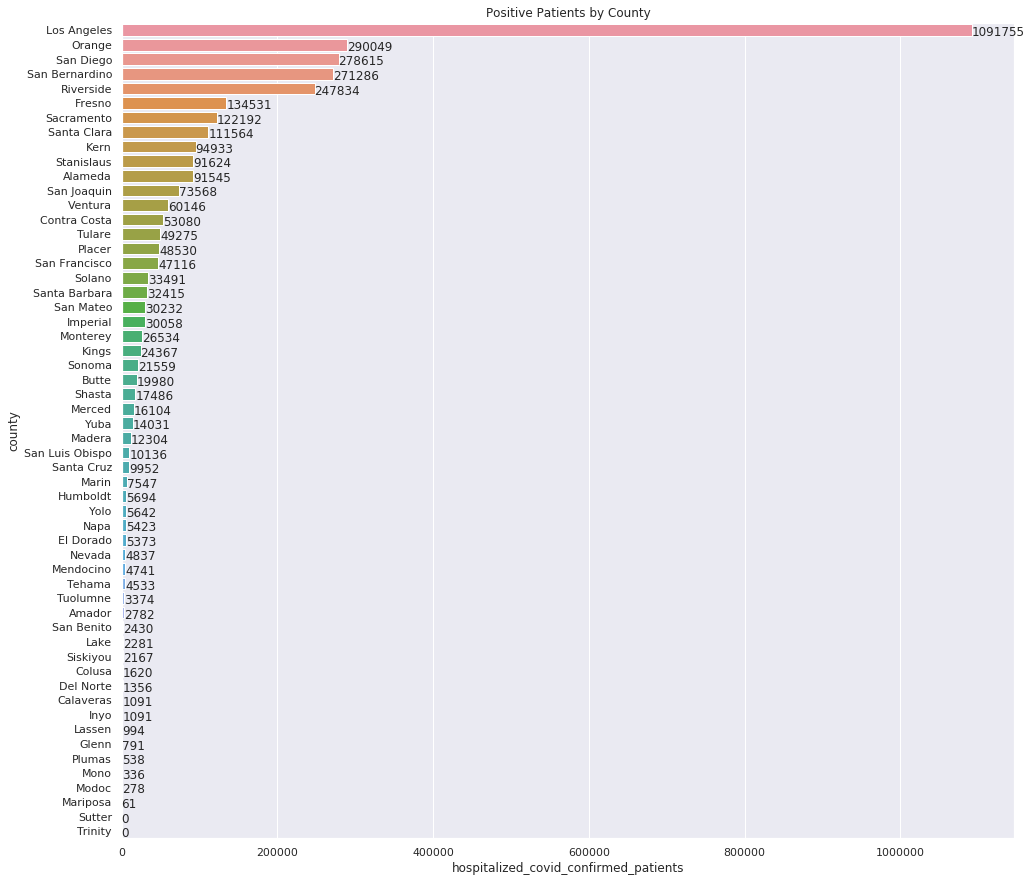

In [14]:
sns.set(rc = {'figure.figsize':(16,15)})
g1 = sns.barplot(x =covid_positive_by_county_rank["hospitalized_covid_confirmed_patients"], 
                 y=covid_positive_by_county_rank ["county"])

initialx=0
for p in g1.patches:
    g1.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g1.set_title("Positive Patients by County")

Text(0.5, 1.0, 'Positive Patients')

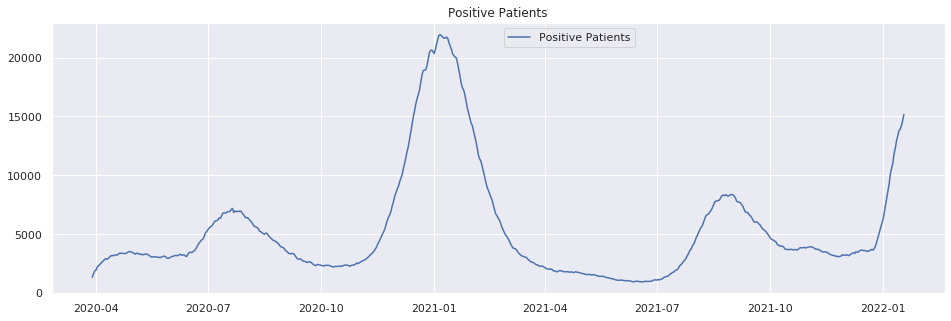

In [15]:
fig1, ax1 = plt.subplots(figsize=(16,5))
ax1.plot(covid_positive_by_date.index, 
         covid_positive_by_date.values, label='Positive Patients')
ax1.legend(bbox_to_anchor=(0.5, 1.0))
ax1.set_title("Positive Patients")

### Suspected Patients

Text(0.5, 1.0, 'Suspected Patients by County')

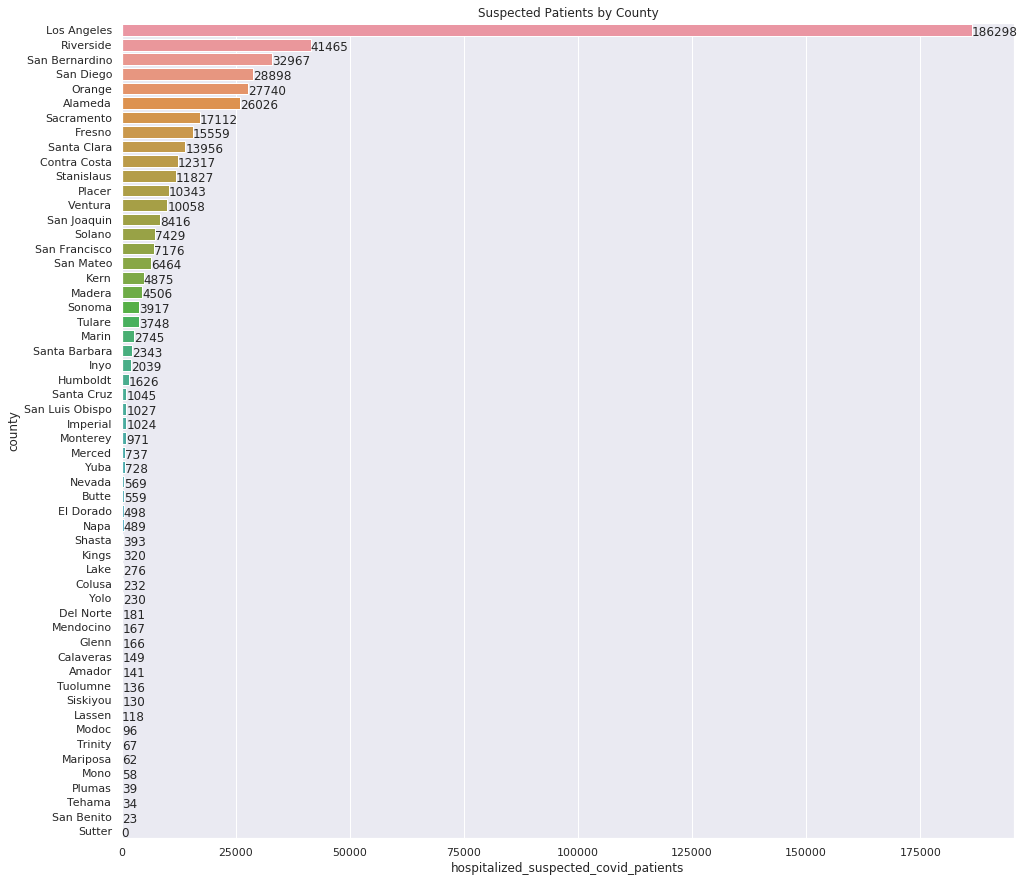

In [16]:
sns.set(rc = {'figure.figsize':(16,15)})
g2 = sns.barplot(x =covid_suspected_by_county_rank["hospitalized_suspected_covid_patients"], 
                 y=covid_suspected_by_county_rank ["county"])

initialx=0
for p in g2.patches:
    g2.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g2.set_title("Suspected Patients by County")

Text(0.5, 1.0, 'Suspected Patients')

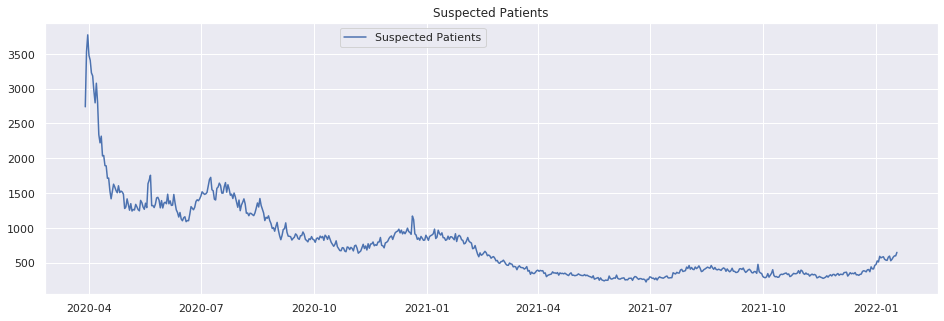

In [17]:
fig2, ax1 = plt.subplots(figsize=(16,5))
ax1.plot(covid_suspected_by_date.index, 
         covid_suspected_by_date.values, label='Suspected Patients')
ax1.legend(bbox_to_anchor=(0.5, 1.0))
ax1.set_title("Suspected Patients")

### ICU Positive Patients

Text(0.5, 1.0, 'ICU Positive Patients by County')

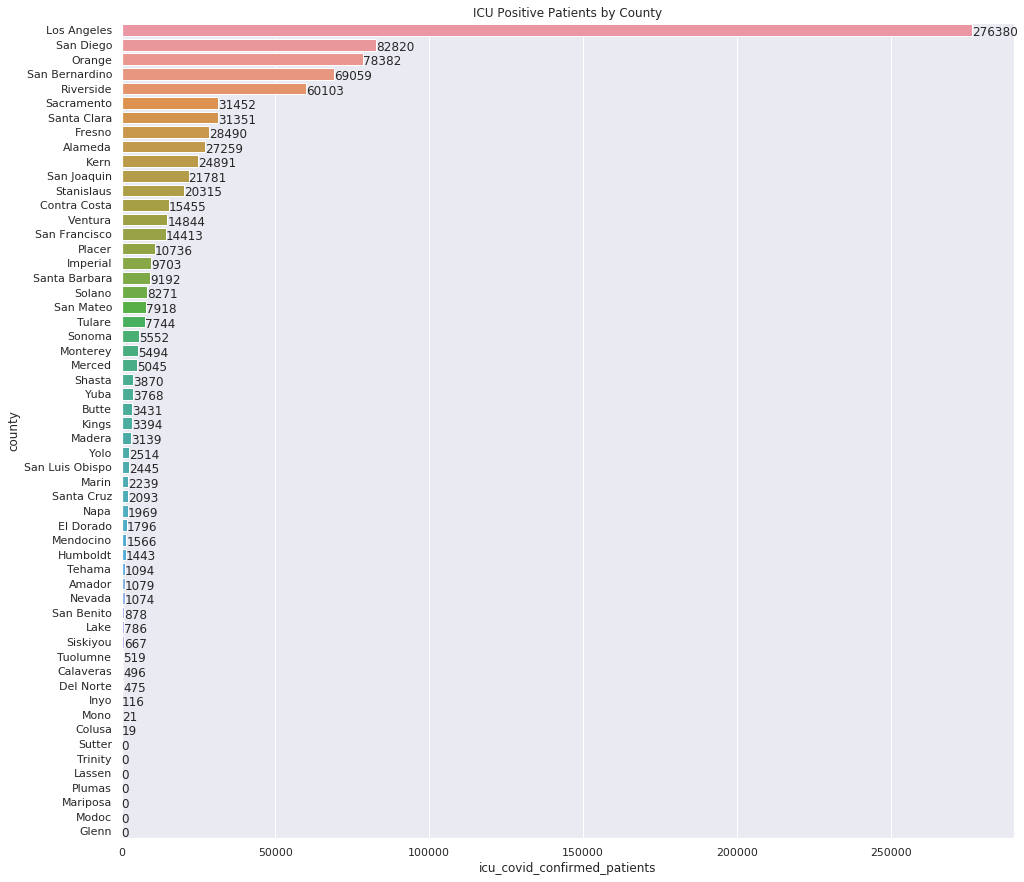

In [18]:
sns.set(rc = {'figure.figsize':(16,15)})
g3 = sns.barplot(x =covid_icu_positive_by_county_rank["icu_covid_confirmed_patients"], 
                 y=covid_icu_positive_by_county_rank ["county"])

initialx=0
for p in g3.patches:
    g3.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g3.set_title("ICU Positive Patients by County")

Text(0.5, 1.0, 'ICU Positive Patients')

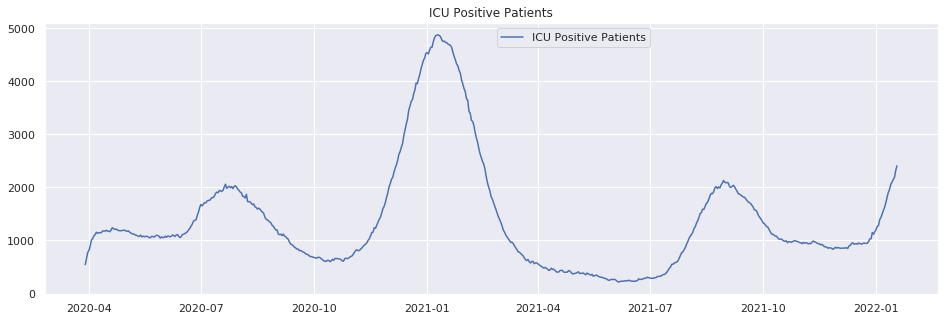

In [19]:
fig3, ax1 = plt.subplots(figsize=(16,5))
ax1.plot(covid_icu_positive_by_date.index, 
         covid_icu_positive_by_date.values, label='ICU Positive Patients')
ax1.legend(bbox_to_anchor=(0.5, 1.0))
ax1.set_title("ICU Positive Patients")

### ICU Suspected Patients

Text(0.5, 1.0, 'ICU Suspected Patients by County')

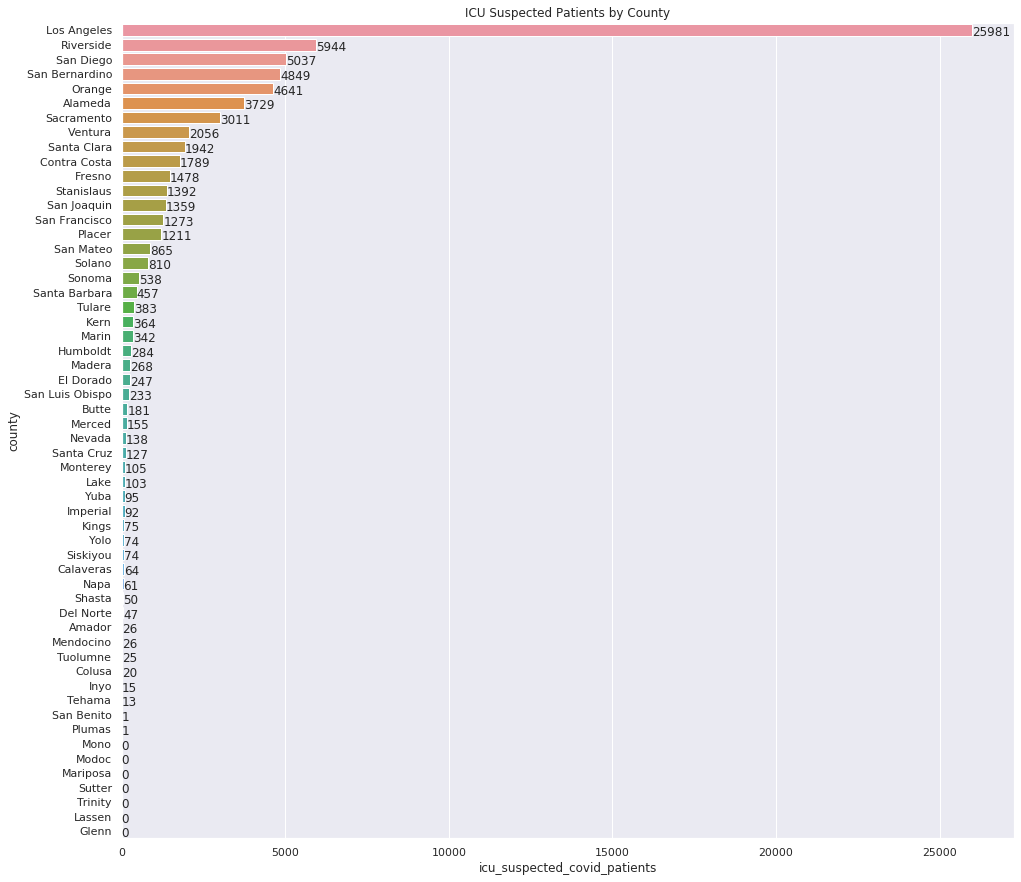

In [20]:
sns.set(rc = {'figure.figsize':(16,15)})
g4 = sns.barplot(x =covid_icu_suspected_by_county_rank["icu_suspected_covid_patients"], 
                 y=covid_icu_suspected_by_county_rank ["county"])

initialx=0
for p in g4.patches:
    g4.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g4.set_title("ICU Suspected Patients by County")

Text(0.5, 1.0, 'ICU Suspected Patients')

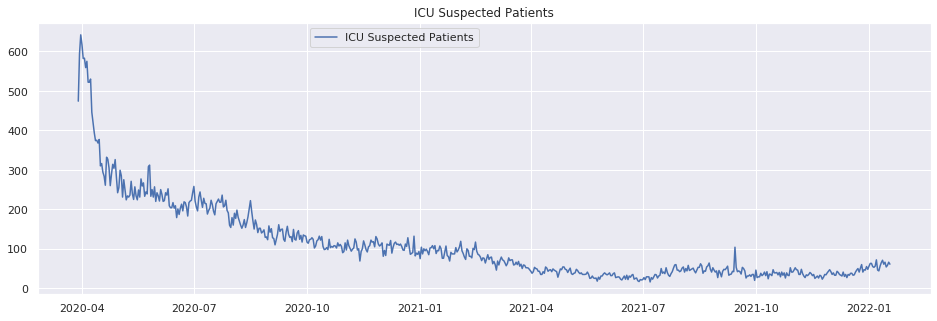

In [21]:
fig4, ax1 = plt.subplots(figsize=(16,5))
ax1.plot(covid_icu_suspected_by_date.index, 
         covid_icu_suspected_by_date.values, label='ICU Suspected Patients')
ax1.legend(bbox_to_anchor=(0.5, 1.0))
ax1.set_title("ICU Suspected Patients")

### ICU Available Beds

Text(0.5, 1.0, 'ICU Available Beds by County')

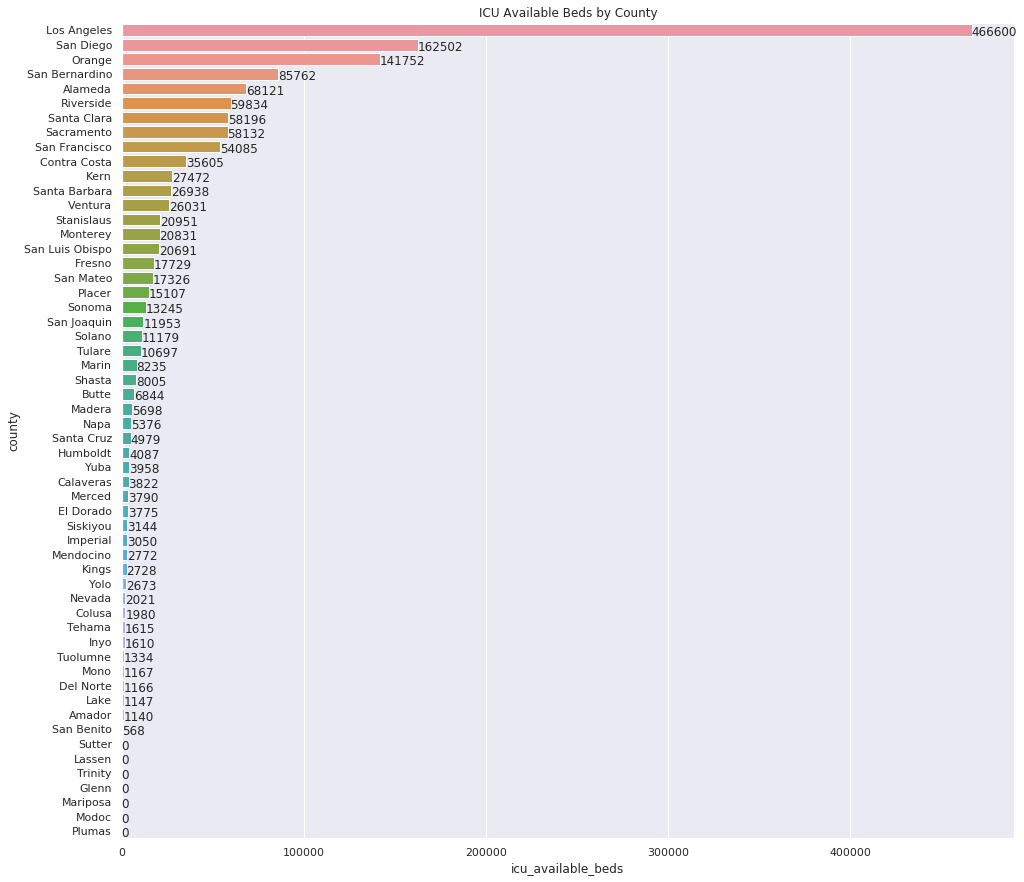

In [22]:
sns.set(rc = {'figure.figsize':(16,15)})
g5 = sns.barplot(x =covid_icu_available_beds_by_county_rank["icu_available_beds"], 
                 y=covid_icu_available_beds_by_county_rank ["county"])

initialx=0
for p in g5.patches:
    g5.text(p.get_width()+1,initialx+p.get_height()/2,"{:1.0f}".format(p.get_width()))
    initialx+=1

g5.set_title("ICU Available Beds by County")

Text(0.5, 1.0, 'ICU Available Beds')

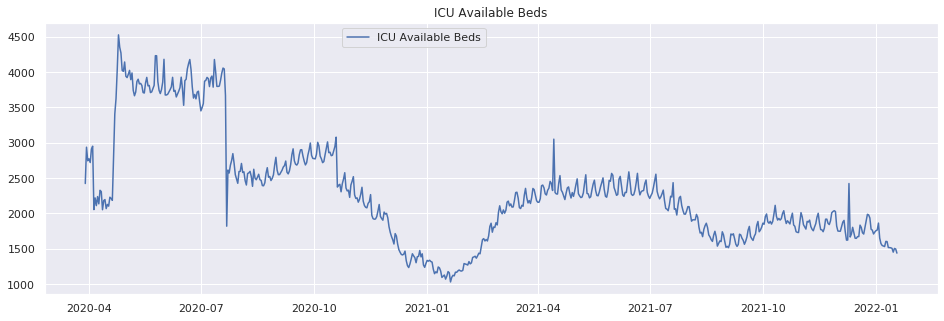

In [23]:
fig5, ax1 = plt.subplots(figsize=(16,5))
ax1.plot(covid_icu_available_beds_by_date.index, 
         covid_icu_available_beds_by_date.values, label='ICU Available Beds')
ax1.legend(bbox_to_anchor=(0.5, 1.0))
ax1.set_title("ICU Available Beds")